### Exploratory Data Analysis for EU IT Salaries 2020

In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the "IT Salary Survey EU" Data Set
ITSalaryEU_df= pd.read_csv('C:/Users/USER/Downloads/IT_Salary_Survey_EU.csv')

In [3]:
ITSalaryEU_df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


### Analyzing the Data

In [4]:
ITSalaryEU_df. info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [5]:
ITSalaryEU_df.shape

(1253, 23)

In [6]:
ITSalaryEU_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1226.0,3.250979e+01,5.663804e+00,20.0,29.0,32.0,35.0,6.900000e+01
Yearly brutto salary (without bonus and stocks) in EUR,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,885.0,6.322459e+05,1.680508e+07,11000.0,55000.0,65000.0,75000.0,5.000000e+08
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",373.0,1.296783e+01,1.527517e+01,0.0,0.0,0.0,30.0,4.000000e+01


In [7]:
ITSalaryEU_df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [8]:
sum(ITSalaryEU_df.duplicated())

0

### Cleaning the Data

#### Rename columns to shorten

In [9]:
ITSalaryEU_df.rename(
columns ={
    'Total years of experience' : 'experience',                                                                                                  
    'Years of experience in Germany' : 'experience_in_Germany',                                                                                             
    'Seniority level': 'Seniority',                                                                                                        
    'Your main technology / programming language': 'main_tech',                                                                             
    'Other technologies/programming languages you use often':'Other_tech',                                                                    
    'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly_brutto_salary',                                                                                                                                                                 
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'Annual brutto salary',                  
    'Annual bonus+stocks one year ago. Only answer if staying in same country': 'Annual_bonus+stocks',                                                  
    'Number of vacation days': 'vacation_days',                                                                                                                                                                                                                  
    'Have you lost your job due to the coronavirus outbreak?':  'lost_job',                                                                 
    'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'shorter_working_week',                         
    'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR':'additional_monetary_support'},
    inplace = True)

In [10]:
ITSalaryEU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     1253 non-null   object 
 1   Age                           1226 non-null   float64
 2   Gender                        1243 non-null   object 
 3   City                          1253 non-null   object 
 4   Position                      1247 non-null   object 
 5   experience                    1237 non-null   object 
 6   experience_in_Germany         1221 non-null   object 
 7   Seniority                     1241 non-null   object 
 8   main_tech                     1126 non-null   object 
 9   Other_tech                    1096 non-null   object 
 10  Yearly_brutto_salary          1253 non-null   float64
 11  Yearly bonus + stocks in EUR  829 non-null    object 
 12  Annual brutto salary          885 non-null    float64
 13  Ann

#### Changing Data Types

In [11]:
ITSalaryEU_df['experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [12]:
ITSalaryEU_df['experience'].str.replace(',', '.')

0        5
1        7
2       12
3        4
4       17
        ..
1248     9
1249    10
1250    15
1251     7
1252     2
Name: experience, Length: 1253, dtype: object

In [13]:
ITSalaryEU_df['experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [14]:
ITSalaryEU_df['experience'] = ITSalaryEU_df['experience'].str.replace(',', '.').replace('[^0-9.]', '', regex=True)
ITSalaryEU_df['experience'] = ITSalaryEU_df['experience'].replace('', '0')
ITSalaryEU_df['experience'] = ITSalaryEU_df['experience'].astype(float)
ITSalaryEU_df['experience'] = ITSalaryEU_df['experience'].replace({
    '1 (as QA Engineer) / 11 in total': 11.0,
    '15, thereof 8 as CTO': 15.0,
    'more than 20': 21.0,
    'less than year': 0
})
#Replacing 383
ITSalaryEU_df.loc[ITSalaryEU_df['experience'] == '383', 'experience'] = ITSalaryEU_df['experience'].median()

#Replacing nan
ITSalaryEU_df['experience'].fillna(value=np.nan, inplace=True)

In [15]:
ITSalaryEU_df['vacation_days'].unique()

array(['30', '28', '24', '29', '27', nan, '25', '31', '26', '60', '20',
       '22', '38', '35', '32', '40', '365', '36', '23', '33', '21',
       'unlimited', '14', 'unlimited ', '(no idea)',
       '30 in contract (but theoretically unlimited)', '0', 'Unlimited ',
       '15', '16', '3', '45', '~25', '12', '50', '23+', '99', 'Unlimited',
       '24 labour days', '37.5', '1', '5', '37', '39', '34', '10'],
      dtype=object)

In [16]:
# replace 'unlimited', '(no idea)', 'Unlimited ' with np.nan
ITSalaryEU_df['vacation_days'] = ITSalaryEU_df['vacation_days'].replace(['unlimited','unlimited ','Unlimited', '(no idea)', 'Unlimited ','nan'], np.nan)

# replace 23+ with 23
ITSalaryEU_df['vacation_days'] = ITSalaryEU_df['vacation_days'].replace('23+', '23')

# replace ~25 with 25
ITSalaryEU_df['vacation_days'] = ITSalaryEU_df['vacation_days'].replace('~25','25')

# replace '30 in contract (but theoretically unlimited)' with 30
ITSalaryEU_df['vacation_days'] = ITSalaryEU_df['vacation_days'].replace('30 in contract (but theoretically unlimited)', '30')

# replace 24 labour days with 24
ITSalaryEU_df['vacation_days'] = ITSalaryEU_df['vacation_days'].replace('24 labour days', '24')


In [17]:
ITSalaryEU_df['vacation_days'].unique()

array(['30', '28', '24', '29', '27', nan, '25', '31', '26', '60', '20',
       '22', '38', '35', '32', '40', '365', '36', '23', '33', '21', '14',
       '0', '15', '16', '3', '45', '12', '50', '99', '37.5', '1', '5',
       '37', '39', '34', '10'], dtype=object)

In [18]:
ITSalaryEU_df['Timestamp']= pd.to_datetime(ITSalaryEU_df['Timestamp'])
ITSalaryEU_df['Age']=ITSalaryEU_df['Age'].astype('Int64')

#### Visualization

#### Pie  Chart Showing Gender Distribution

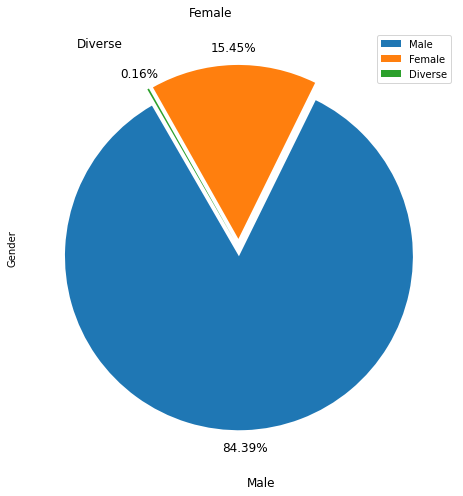

In [25]:
plt.figure(figsize=(11,8))
ITSalaryEU_df['Gender'].value_counts().plot.pie(autopct="%1.2f%%",fontsize=12,startangle=120,explode=[0.05] * 3,pctdistance=1.1,labeldistance=1.3,textprops={'fontsize': 15})
plt.legend(loc='upper right');

This shows that there are more males than Females

#### Bar Chart showing Distribution of Age

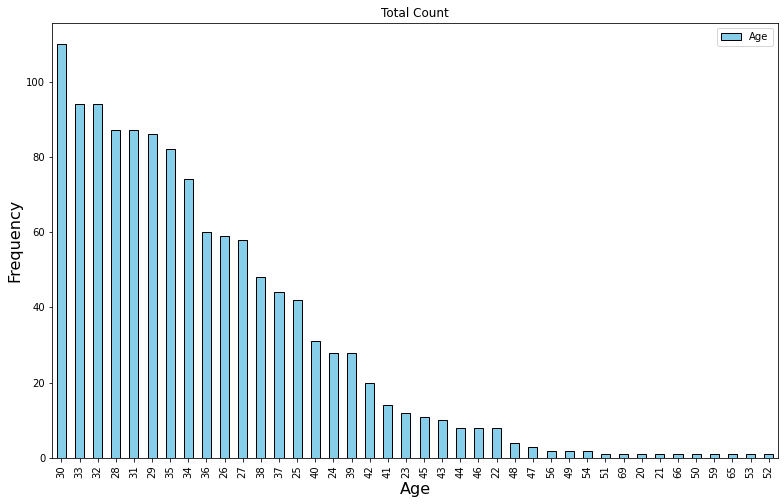

In [20]:
ITSalaryEU_df['Age'].value_counts().plot(kind ='bar',figsize = (13,8), color='skyblue', edgecolor='black', title='Distribution of Age');
plt.xlabel("Age", size=(16));
plt.ylabel("Frequency", size=(16));
plt.legend();

This shows that majorityof those who work in the IT industry are between 25-40 years

#### Bar chat showing Distribution in Terms of Cities

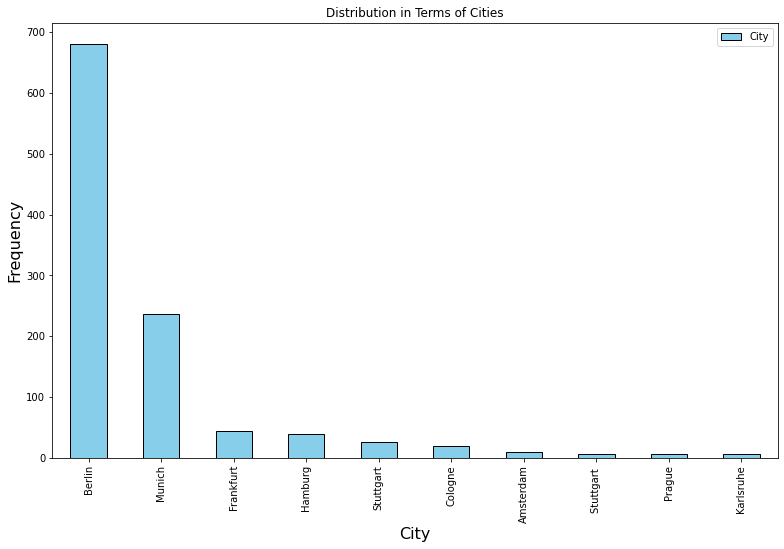

In [22]:
ITSalaryEU_df['City'].value_counts()[0:10].plot(kind ='bar',figsize = (13,8), color='skyblue', edgecolor='black', title='Distribution in Terms of Cities');
plt.xlabel("City", size=(16));
plt.ylabel("Frequency", size=(16));
plt.legend();


Most of the IT practitioners came from the Berlin,Munich, Frankfurt and Hamburg